<div style="line-height:1.2;">

<h1 style="color:#BF66F2; margin-bottom: 0.3em;"> Linear regression in PyTorch </h1>
<h4 style="margin-top: 0.3em; margin-bottom: 1em;"> Some regression examples on various custom data. </h4>
<div style="line-height:1.4; margin-bottom: 0.5em;">
    <h3 style="color: lightblue; display: inline; margin-right: 0.5em;">Keywords:</h3> 
random_state + eshape() + numpy make_regression() + detach() + StandardScaler + zero_grad() + plt.legend loc
</div>

</div>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim

<h2 style="color:#BF66F2 "> <u> Example #1</u>  </h2>
Linear regression with numpy

<h3 style="color:#BF66F2"> Recap: Gradient descent optimizer </h3>
<div style="margin-top: -7px;">
Simple first-order iterative optimization algorithm (no bias involved) for finding a local minimum of a differentiable function. <br>
It minimizes a loss function by iteratively moving toward the minimum value of the function, which is achieved by updating the <br>
parameters in the opposite direction of the gradient (or the steepest decrease) of the function. <br>
Hebb's rule.
<br>

1. **Mean Squared Error (MSE):**
$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( (w \cdot x_i - y_i)^2 \right) $

Where:
<div style="margin-top: -20px;">

- \( n \): Number of observations
- \( x_i \): Input value for the \(i\)th observation
- \( y_i \): Actual output value for the \(i\)th observation
- \( w \): Weight parameter
</div>

2. **Gradient of MSE with respect to \(w\):**
$ \frac{dJ}{dw} = \frac{2}{n} \sum_{i=1}^{n} x_i \cdot \left( w \cdot x_i - y_i \right) $

Where:
<div style="margin-top: -20px;">

- \( J \): The cost function (in this case, MSE)
</div>
</div>

In [6]:
# Force PyTorch to use CPU, to avoid CUDA warnings
device = torch.device("cpu") 

In [3]:
""" Gradient descent and forward pass. """
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

def forwardpass(x):
    return x * w

def loss(y, y_pred):
    # return np.sum((y_pred - y) ** 2)
    return np.mean((y_pred - y) ** 2)

def gradient(x, y, y_predicted):
    """ Calculate the gradient with the derivative formula 
    # MSE = 1/n * ((w*x - y) ** 2)
    # dJ / dw = 1/n * 2X * ((w*x- y)
    """
    return np.dot(2 * x, (y_predicted - y)).mean()

print(f"Prediction before training : f{5} = {forwardpass(5):.3f}")

Prediction before training : f5 = 0.000


In [4]:
""" Training. 
- Define a linear regression model with a single weight parameter w, and uses the mean squared error (MSE) loss function.

- Measure the loss, the difference between the predicted output and the true output. 
- Compute the gradient of the loss with respect to the w (weight parameter), using the derivative of the MSE function.
- Update w using the calculated gradient and a fixed learning rate.
    The '-' sing means => moving in the opposite direction of the gradient.
"""
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    y_pred = forwardpass(X)
    l = loss(Y, y_pred) 
    dw = gradient(X, Y, y_pred)
    w = w - learning_rate * dw

    if epoch % 1 == 0:
        print(f"Epoch {epoch+1} : w = {w:.3f}, loss = {l:.3f}")
print("Final w is ", w)

Epoch 1 : w = 1.200, loss = 30.000
Epoch 2 : w = 1.680, loss = 4.800
Epoch 3 : w = 1.872, loss = 0.768
Epoch 4 : w = 1.949, loss = 0.123
Epoch 5 : w = 1.980, loss = 0.020
Epoch 6 : w = 1.992, loss = 0.003
Epoch 7 : w = 1.997, loss = 0.001
Epoch 8 : w = 1.999, loss = 0.000
Epoch 9 : w = 1.999, loss = 0.000
Epoch 10 : w = 2.000, loss = 0.000
Final w is  1.999790253639221


<h2 style="color:#BF66F2 "> <u> Example #2</u>  </h2>
Make the model explicit => Encapsulate!

In [ ]:
class MyCustomLinearRegression:
    """ Implementation of a simple linear regression model using gradient descent.

    Attributes:
        Weight [float]

    Methods:
        forwardpass(x: np.ndarray) -> np.ndarray:
            Computes the predicted values using the current weight.
            
        loss(y: np.ndarray, y_pred: np.ndarray) -> float:
            Computes the mean squared error between the actual and predicted values.
            
        gradient(x: np.ndarray, y: np.ndarray, y_predicted: np.ndarray) -> float:
            Computes the gradient of the loss with respect to the weight.
            
        train(X: np.ndarray, Y: np.ndarray, learning_rate: float, n_iters: int) -> None:
            Trains the linear regression model using gradient descent.
    """
    def __init__(self):
        self.w = 0.0

    def forwardpass(self, x):
        """ Compute the predicted values using the current weight. """
        return x * self.w

    def loss(self, y, y_pred):
        """ Compute the mean squared error between the actual and predicted values. """
        return np.mean((y_pred - y) ** 2)

    def gradient(self, x, y, y_predicted):
        """ Compute the gradient of the loss with respect to the weight. """
        return np.dot(2 * x, (y_predicted - y)).mean()

    def train(self, X, Y, learning_rate, n_iters):
        """ Trains the linear regression model using gradient descent. 
        
        Parameters:
            - Training input data [ndarray]
            - Training output/actual values [ndarray]
            - Learning rate for gradient descent [float]
            - Number of iterations for training [int]
        """
        for epoch in range(n_iters):
            y_pred = self.forwardpass(X)
            l = self.loss(Y, y_pred)
            dw = self.gradient(X, Y, y_pred)
            self.w = self.w - learning_rate * dw

            if epoch % 1 == 0:
                print(f"Epoch {epoch+1} : w = {self.w:.3f}, loss = {l:.3f}")
        print("Final w is ", self.w)

In [ ]:
model = MyCustomLinearRegression()

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

print(f"Prediction before training : f{5} = {model.forwardpass(5):.3f}")

learning_rate = 0.01
n_iters = 10
model.train(X, Y, learning_rate, n_iters)

<h2 style="color:#BF66F2 "> <u> Example #3 </u>  </h2>
Linear regression with torch

In [7]:
""" Two tensors, with 4 samples with 1 feature each.
N.B.
Using a single sample (one feature with an UNSEEN value) 'X_test' as input test tensor, 
the expected output of the model for X_test is f(5) = 10, since the relationship between X and Y is Y = 2X.
"""

X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)
X_test = torch.tensor([5], dtype=torch.float32) 

print(X_test)
n_samples, n_features = X.shape
print(n_samples)
print(n_features)

input_size = ouput_size = n_features 

# Apply a linear transformation (y = xA^T + b) to the incoming data
model = nn.Linear(input_size, ouput_size) 

# Display result with 3 decimal places 
print(f'Prediction before training = {model(X_test).item():.3f}')   

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)   #parameters = weight and bias

print("Training....")
for epoch in range(n_iters):
    y_pred = model(X)
    problem_loss = loss(Y, y_pred)
    # Perform gradient dl/dw 
    problem_loss.backward()       
    # Update weights step of SDG
    optimizer.step()              
    # Set the gradients of all the parameters in the optimizer to zero at the beginning of each iter of training, 
    # to avoid accumulating gradients from the previous iteration
    optimizer.zero_grad()
    if epoch % 10==0:
        [w, b] = model.parameters()
        print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {problem_loss:.8f}')

print(f"\nThe prediction after training is f(5) = {model(X_test).item():.3f}")
print("X_test size is: {}".format(model(X_test).size()))

tensor([5.])
4
1
Prediction before training = -2.882
Training....
epoch 1: w = -0.319, loss = 46.86519623
epoch 11: w = 1.257, loss = 1.49025583
epoch 21: w = 1.521, loss = 0.30013183
epoch 31: w = 1.575, loss = 0.25411555
epoch 41: w = 1.593, loss = 0.23858595
epoch 51: w = 1.606, loss = 0.22467998
epoch 61: w = 1.618, loss = 0.21160190
epoch 71: w = 1.630, loss = 0.19928566
epoch 81: w = 1.641, loss = 0.18768603
epoch 91: w = 1.651, loss = 0.17676175

The prediction after training is f(5) = 9.301
X_test size is: torch.Size([1])


<h2 style="color:#BF66F2 "> <u> Example #4 </u>  </h2>
Using make_regression

<h4 style="color:#BF66F2 ">  Note: </h4>
<div style="margin-top: -30px;">
To define a random number generator for the dataset, the 'random_state' param can be used to ensure that the synthetic dataset is reproducible. <br>
When 'random_state' is set to a fixed value, the same dataset will be generated every time the code is run, allowing consistent results across runs. <br>
Otherwise, if the random_state parameter is not set, "make_regression()" will use a random seed based on the current time, <br>
so a different dataset will be generated every time.
</div>

In [8]:
""" Generate a random regression problem. 
    - get / prepare data
    - define the model
    - define the loss + define the optimizer 
    - train
"""
X_nump, y_nump = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)  

X = torch.from_numpy(X_nump.astype(np.float32))     #convert to float to prevent errors 
y = torch.from_numpy(y_nump.astype(np.float32)) 

print(f"type of X_nump is {type(X_nump)}")
print(f"type of y_nump is {type(y_nump)}")
print(f"X {X[:5]}")
print(f"y {y[:5]}")
print(f"type of X is {type(X)}")
print(f"type of y is {type(y)}")
print("X size before:", X.size())
print("y size before:", y.size())

type of X_nump is <class 'numpy.ndarray'>
type of y_nump is <class 'numpy.ndarray'>
X tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198]])
y tensor([-55.5386, -10.6620,  22.7574, 101.0961, 144.3376])
type of X is <class 'torch.Tensor'>
type of y is <class 'torch.Tensor'>
X size before: torch.Size([100, 1])
y size before: torch.Size([100])


In [9]:
""" Create Linear Regression model.
N.B.1
Reshaping is important 'cause the mean_squared_error loss function expects the predicted output y_pred and 
the actual output y to have the same shape. 
To be able to compute the element-wise squared difference between them and take their mean. 
N.B.2
The result of the view is re-assigned to y (modified in place) since there is no need to create another tensor here! 
PyTorch tensors are mutable.
"""

# Reshape the output tensor y from a 1-dimensional tensor to a 2-dimensional tensor.
print("y size before:", y.size())
y = y.view(y.shape[0], 1) 
print("y:\n", y[:1])
print("y size after:", y.size())
n_samples, n_features = X.shape
print("n_samples = {}".format(n_samples))
print("n_features = {}".format(n_features))

input_size = n_features
ouput_size = 1
l_rate = 0.01
num_epochs = 100

y size before: torch.Size([100])
y:
 tensor([[-55.5386]])
y size after: torch.Size([100, 1])
n_samples = 100
n_features = 1


In [10]:
""" Train Linear model """
model = nn.Linear(input_size, ouput_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=l_rate)
print("Training...")
for epoch in range(num_epochs):
    y_predicted = model(X)                  # forward pass
    loss = criterion(y_predicted, y)        # loss
    loss.backward()                         # backward pass
    optimizer.step()                        # update weights
    optimizer.zero_grad()                   # reset gradients

    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch + 1}: loss = {loss.item():.4f}')

Training...
epoch 10: loss = 4336.2212
epoch 20: loss = 3236.3154
epoch 30: loss = 2440.4548
epoch 40: loss = 1863.9799
epoch 50: loss = 1446.0028
epoch 60: loss = 1142.6686
epoch 70: loss = 922.3480
epoch 80: loss = 762.1985
epoch 90: loss = 645.7036
epoch 100: loss = 560.9084


<h4 style="color:#BF66F2 ">  Plot results </h4>

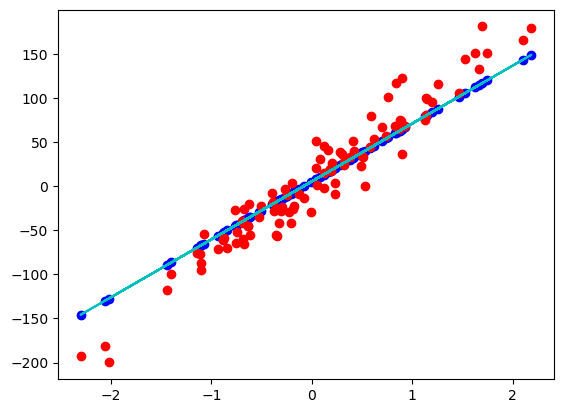

In [11]:
""" Plotting. 
N.B.1
It is necessary to to get a new generated NumPy array from the predicted output tensor of the linear regression model.
N.B.2
- The detach() method detaches the tensor from the computation graph means that it removes the tensor 
    from any further backpropagation calculations and returns a new tensor that shares the same data as the original tensor,
    but has no connection to the computation graph. 
    In fact, when doing operations on a PyTorch tensor, these are recorded in a computation graph, 
    which is used to compute gradients and update the model parameters during backpropagation. 
- The detach() method removes the tensor from the computation graph, which means that any operations performed 
    on the detached tensor will not be tracked for gradient computation or parameter updates.
    Detaching the tensor from the computation graph, means to ensure that any operations performed on the tensor 
    do not affect the gradients or parameter updates of the model. 
N.B.3
- Available plt colors (using one letter): 
    'b' - blue ; 'g' - green ; 'r' - red ; 'c' - cyan'; m' - magenta ; 'y' - yellow ; 'k' - black ; 'w' - white 
"""

#predicted = model(X).detach().numpy().reshape(-1, 1)       # incorrect!
predicted = model(X).detach().numpy()                       # correct! 1-dimension = line

plt.plot(X_nump, y_nump, 'ro')             # red dots
plt.plot(X_nump, predicted, 'c')           # cyan line
plt.scatter(X_nump, predicted, c='b')      # blue dots
# Save to file
#plt.savefig('./save_fig_1.png', dpi=300)
plt.show()

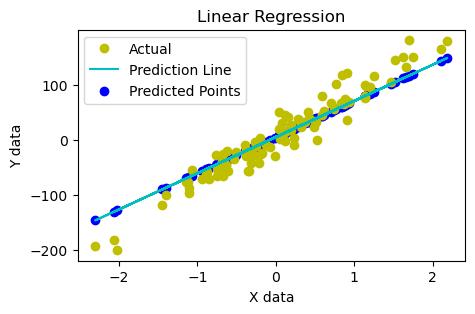

In [12]:
""" Refine plot """
# Adjust figure size (5x3 inches)
plt.figure(figsize=(5, 3)) 
### Plot data
plt.plot(X_nump, y_nump, 'yo', label='Actual')   
plt.plot(X_nump, predicted, 'c', label='Prediction Line') 
plt.scatter(X_nump, predicted, c='b', label='Predicted Points') 
# Add labels and title
plt.xlabel('X data')
plt.ylabel('Y data')
plt.title('Linear Regression')
# Add legend
plt.legend(loc='upper left') 
plt.show()

<h2 style="color:#BF66F2 "> <u> Example #5 </u>  </h2>
Inheriting from nn.Module.

In [24]:
# Create a Linear Regression Model from base class
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # Define the linear layer
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

#### => Case 5.1 too naive

In [25]:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

In [26]:
input_dim, output_dim = 1, 1
### Model, Loss, and Optimizer
model = LinearRegression(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training
epochs = 100
for epoch in range(epochs):
    # Perform Forward pass
    y_pred = model(X)
    # Compute the loss
    loss = criterion(y_pred, Y)
    # Reset gradients, perform backward pass, do optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.3f}")

Epoch 1: Loss = 21.634
Epoch 11: Loss = 0.861
Epoch 21: Loss = 0.306
Epoch 31: Loss = 0.275
Epoch 41: Loss = 0.259
Epoch 51: Loss = 0.244
Epoch 61: Loss = 0.230
Epoch 71: Loss = 0.216
Epoch 81: Loss = 0.204
Epoch 91: Loss = 0.192


In [27]:
# Test single sample 
test_data = torch.tensor([5], dtype=torch.float32)
print(f"Prediction result, after training: f(5) = {model(test_data).item():.3f}")

Prediction after training: f(5) = 9.271


<h4> => Case 5.2 just increasing the number of data problems arise! </h4>
<div style="margin-top: -25px;">
The model training is diverging, meaning the weights are getting updated in a way that makes the predictions progressively worse, not better.

In [30]:
X_list = [3, 7, 11, 15, 2, 6, 9, 13, 18, 21, 5, 10, 14, 19, 1, 4, 8, 12, 16, 20]
Y_list = [6, 14, 22, 30, 4, 12, 18, 26, 36, 42, 10, 20, 28, 38, 2, 8, 16, 24, 32, 40]

X = torch.tensor(X_list, dtype=torch.float32).view(-1, 1)
Y = torch.tensor(Y_list, dtype=torch.float32).view(-1, 1)

In [31]:
input_dim, output_dim = 1, 1
### Model, Loss, and Optimizer
model = LinearRegression(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training
epochs = 100
for epoch in range(epochs):
    # Perform Forward pass
    y_pred = model(X)
    # Compute the loss
    loss = criterion(y_pred, Y)
    # Reset gradients, perform backward pass, do optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.3f}")

Epoch 1: Loss = 1179.687
Epoch 11: Loss = 1787890944.000
Epoch 21: Loss = 2709706141335552.000
Epoch 31: Loss = 4106800412051810287616.000
Epoch 41: Loss = 6224219514825057763596435456.000
Epoch 51: Loss = 9433358733972710125758093256032256.000
Epoch 61: Loss = inf
Epoch 71: Loss = inf
Epoch 81: Loss = inf
Epoch 91: Loss = inf


In [20]:
# Test
test_data = torch.tensor([5], dtype=torch.float32)
print(f"Prediction after training: f(5) = {model(test_data).item():.3f}")

Prediction after training: f(5) = -51357664040121131936134950027264.000


#### => Case 5.3) Reduce the learning rate! 0.01 is too much ! 

In [35]:
input_dim, output_dim = 1, 1
### Model, Loss, and Optimizer
model = LinearRegression(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Training
epochs = 100
for epoch in range(epochs):
    # Perform Forward pass
    y_pred = model(X)
    # Compute the loss
    loss = criterion(y_pred, Y)
    # Reset gradients, perform backward pass, do optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.3f}")

Epoch 1: Loss = 392.471
Epoch 11: Loss = 211.801
Epoch 21: Loss = 114.304
Epoch 31: Loss = 61.691
Epoch 41: Loss = 33.299
Epoch 51: Loss = 17.977
Epoch 61: Loss = 9.709
Epoch 71: Loss = 5.247
Epoch 81: Loss = 2.839
Epoch 91: Loss = 1.540


#### => Case 5.4) Normalize data, with an high learning rate!

In [38]:
X_mean, X_std = X.mean(), X.std()
Y_mean, Y_std = Y.mean(), Y.std()
X_normalized = (X - X_mean) / X_std
Y_normalized = (Y - Y_mean) / Y_std

In [40]:
input_dim, output_dim = 1, 1
### Model, Loss, and Optimizer
model = LinearRegression(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training
epochs = 100
for epoch in range(epochs):
    # Perform Forward pass
    y_pred = model(X)
    # Compute the loss
    loss = criterion(y_pred, Y)
    # Reset gradients, perform backward pass, do optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.3f}")

Epoch 1: Loss = 245.835
Epoch 11: Loss = 0.426
Epoch 21: Loss = 0.248
Epoch 31: Loss = 0.245
Epoch 41: Loss = 0.243
Epoch 51: Loss = 0.241
Epoch 61: Loss = 0.238
Epoch 71: Loss = 0.236
Epoch 81: Loss = 0.234
Epoch 91: Loss = 0.231


In [44]:
""" Predict.
Using normalized data, then revert the normalization """
test_data_normalized = (torch.tensor([5], dtype=torch.float32) - X_mean) / X_std
predicted_normalized = model(test_data_normalized)
predicted = predicted_normalized * Y_std + Y_mean

print(f"Prediction giving Tensor 5 = {predicted.item():.14f}")

Prediction giving Tensor 5 = 11.46195316314697


<h4 style="color:#BF66F2 ">  Note: </h4>
<div style="margin-top: -32px;">
The weight represents the slope of the linear relationship between the input tensor X and the output tensor y, while the bias represents the intercept. <br>
=> Check model.parameters() to get weights and bias of a trained model. <br>

In [21]:
for param in model.parameters():
    print(param.data)

tensor([[-1.0128e+31]])
tensor([-7.1834e+29])


<h2 style="color:#BF66F2 "> <u> Example #6 </u>  </h2>
Using nonlinear data

In [65]:
# Features and labels
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float32).reshape(-1, 1)
Y = 12*X**6 + X**4 + 3*X**3 + 2*X**2 + 4

## Convert numpy arrays to PyTorch tensors
X_torch = torch.from_numpy(X).float()
Y_torch = torch.from_numpy(Y).float()

X_torch.shape, Y_torch.shape

(torch.Size([10, 1]), torch.Size([10, 1]))

In [66]:
X_torch, Y_torch

(tensor([[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]]),
 tensor([[2.2000e+01],
         [8.2000e+02],
         [8.9320e+03],
         [4.9636e+04],
         [1.8855e+05],
         [5.6189e+05],
         [1.4153e+06],
         [3.1515e+06],
         [6.3862e+06],
         [1.2013e+07]]))

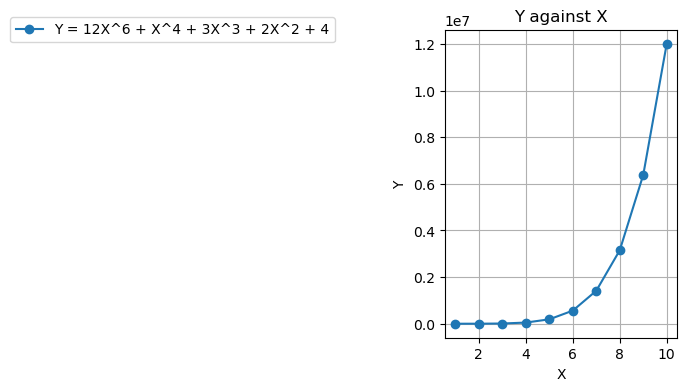

In [82]:
plt.figure(figsize=(3, 4)) 
plt.plot(X, Y, 'o-', label='Y = 12X^6 + X^4 + 3X^3 + 2X^2 + 4')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y against X')
#plt.legend()
# Place legend to the left and outside
plt.legend(loc="center left", bbox_to_anchor=(-1.9, 1))


plt.grid(True)
plt.show()

In [67]:
# Define a Feedforward Neural Network with Relu activation function
class MyNeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MyNeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()  

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [68]:
##### Define model, Loss, and Optimizer
hidden_dim = 20
input_dim, output_dim = 1, 1

model = MyNeuralNet(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

########## Train
epochs = 5000
for epoch in range(epochs):
    y_pred = model(X_torch)
    loss = criterion(y_pred, Y_torch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.3f}")

Epoch 1: Loss = 19738960855040.000


Epoch 501: Loss = 14124016730112.000
Epoch 1001: Loss = 14085935595520.000
Epoch 1501: Loss = 14085934546944.000
Epoch 2001: Loss = 14085934546944.000
Epoch 2501: Loss = 14085934546944.000
Epoch 3001: Loss = 14085934546944.000
Epoch 3501: Loss = 14085934546944.000
Epoch 4001: Loss = 14085934546944.000
Epoch 4501: Loss = 14085934546944.000


In [69]:
# Test 
test_data = torch.tensor([[5.0]])
print(f"Prediction after training: f(5) = {model(test_data).item():.3f}")

Prediction after training: f(5) = 2377601.500


In [83]:
""" Disable (temporarily) gradient calculation, when doing forward-pass predictions  """
with torch.no_grad():
    predictions = model(X_torch)

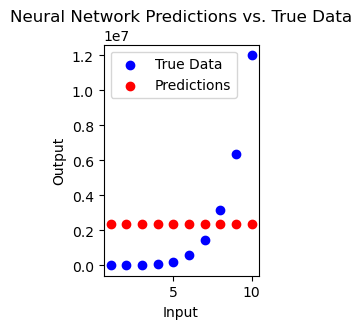

In [84]:
### Convert tensors to numpy arrays for plotting
X_np = X_torch.numpy()
Y_np = Y_torch.numpy()
predictions_np = predictions.numpy()

plt.figure(figsize=(2, 3)) 
plt.scatter(X_np, Y_np, label='True Data', color='blue')
plt.scatter(X_np, predictions_np, label='Predictions', color='red')
plt.legend()
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Neural Network Predictions vs. True Data')

plt.show()

<h2 style="color:#BF66F2 "> <u> Example #7 </u>  </h2>

In [85]:
# Generate a synthetic dataset (adding some noise!)
num_samples = 1000
X = torch.linspace(-10, 10, num_samples).view(-1, 1)
Y = 5 * X**3 - 2 * X**2 + 7 * X - 6 + torch.randn(X.size()) * 500  

In [86]:
class MoreComplexLinearReg(nn.Module):
    def __init__(self):
        super(MoreComplexLinearReg, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.layer(x)

In [87]:
model = MoreComplexLinearReg()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

""" Training """
epochs = 5000
for epoch in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item():.3f}")

Epoch 1: Loss = 3957753.750
Epoch 501: Loss = 272056.969
Epoch 1001: Loss = 268510.062
Epoch 1501: Loss = 267495.219
Epoch 2001: Loss = 266204.969
Epoch 2501: Loss = 267160.969
Epoch 3001: Loss = 265208.031
Epoch 3501: Loss = 264300.531
Epoch 4001: Loss = 264319.094
Epoch 4501: Loss = 262835.375


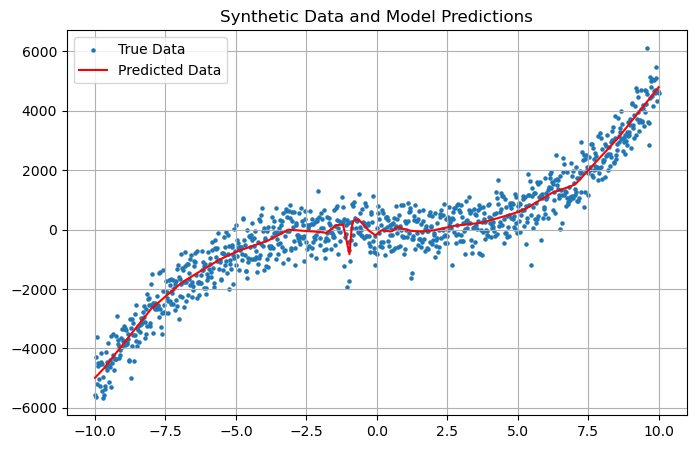

In [88]:
with torch.no_grad():
    y_pred = model(X)
    plt.figure(figsize=(8, 5))
    plt.scatter(X.numpy(), Y.numpy(), label="True Data", s=5)
    plt.plot(X.numpy(), y_pred.numpy(), 'r-', label="Predicted Data")
    plt.title("Synthetic Data and Model Predictions")
    plt.legend()
    plt.grid(True)
    plt.show()